In [43]:
%pylab inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


## Vector

Vector는 magnitude와 direction을 갖은 array라고 보면 됩니다.

$$ \textbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ ... \\ x_n \end{bmatrix}  $$

Indexing은 예를 들어서 1, 2, 6번 element를 access 한다면 $ x_1, x_2, x_6 $ 이렇게 표기를 하며 집합으로는 $ \{1, 3, 6 \} $으로 표기합니다. 

In [2]:
# vector x의 {1, 3, 6}을 access하는 방법
x = np.array([0.5, 0.7, 0.9, 1, 2, 4, 8, -0.1, -0.2, -0.3])
x[[1, 3, 6]]

array([ 0.7,  1. ,  8. ])

## Vector Addition

$$ \textbf{a} = \begin{bmatrix} 6 \\ -2 \end{bmatrix},\ \textbf{b} = \begin{bmatrix} -4 \\ 4 \end{bmatrix} $$

$$ \textbf{a} + \textbf{b} = \begin{bmatrix} 2 \\ 2 \end{bmatrix} $$

In [3]:
a = np.array([6, -2])
b = np.array([-4, 4])
a + b

array([2, 2])

[0]: [ 6 -2]
[1]: [2 2]


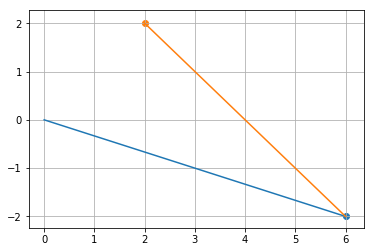

In [4]:
def visualize_add(*points):
    prev_point = [0, 0]
    for i, point in enumerate(points):
        point = np.array(point)
        next_point = prev_point + point
        print(f'[{i}]: {next_point}')
        plot(*np.dstack([prev_point, next_point])[0])
        scatter(*next_point)
        prev_point = next_point
    grid()
    
visualize_add([6, -2], [-4, 4])

[0]: [1 1]
[1]: [2 3]
[2]: [3 7]
[3]: [ 4 15]


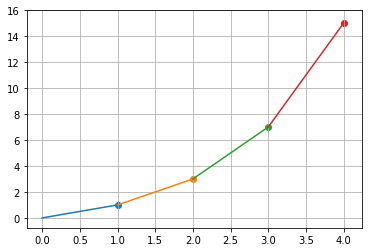

In [5]:
visualize_add([1, 1], [1, 2], [1, 4], [1, 8])

[0]: [-4 -4]
[1]: [-4 -2]
[2]: [-1 -4]


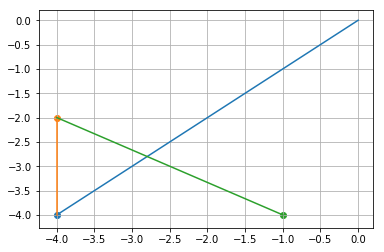

In [6]:
visualize_add([-4, -4], [0, 2], [3, -2])

# Multiplying a vector by a scalar

$$ \textbf{a} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$$

$$ 3 \cdot \textbf{a} = \begin{bmatrix} 6 \\ 3 \end{bmatrix} $$

In [7]:
a = np.array([2, 1])
3 * a

array([6, 3])

[0]: [2 1]
[1]: [6 3]


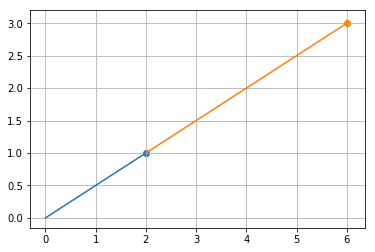

In [8]:
def visualize_multiply_by_scalar(*points):
    prev_point = [0, 0]
    for i, point in enumerate(points):
        point = np.array(point)
        if i == 0:
            next_point = point
        else:
            next_point = prev_point * point
        print(f'[{i}]: {next_point}')
        plot(*np.dstack([prev_point, next_point])[0])
        scatter(*next_point)
        prev_point = next_point
    grid()

visualize_multiply_by_scalar([2, 1], 3)

[0]: [4 1]
[1]: [12  3]


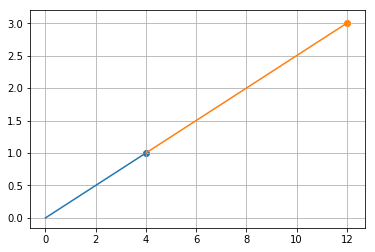

In [9]:
visualize_multiply_by_scalar([4, 1], 3)

[0]: [-1  2]
[1]: [-1.5  3. ]
[2]: [-3.  6.]
[3]: [ -9.  18.]


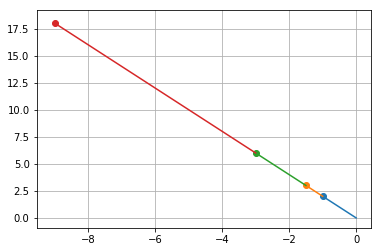

In [10]:
visualize_multiply_by_scalar([-1, 2], 1.5, 2, 3)

# Magnitude 

* [Vector dot product and vector length](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length) 동영상 참고


Vector Length는 magnitude를 구하는 것과 같으며 다음과 같습니다.

$$ \| \textbf{a} \| = \sqrt{ a^2_1 + a^2_2 + ... + a^2_N} $$

예를 들어서 vector $ \begin{bmatrix} 5 \\ 5 \end{bmatrix} $ 는 $ \sqrt{5^2 + 5^2} = \sqrt{50} $

In [11]:
def magnitude(vector):
    return np.sqrt(np.sum(vector**2))

a = np.array([5, 5])

print('Numpy Norm:\t', np.linalg.norm(a))
print('Magnitude: \t', magnitude(a))

Numpy Norm:	 7.07106781187
Magnitude: 	 7.07106781187


# Dot Product

* https://en.wikipedia.org/wiki/Dot_product

dot product는 2 vectors사이의 선을 그려넣을때 나오는 magnitude의 값과도 같습니다. <br>
따라서 Dot Product는 다음의 공식과도 같습니다. 

$$ \| \textbf{a} \| \cdot \| \textbf{b} \| * cos(\theta) $$

$ cos(\theta) $를 사용하는 이유는 magnitude란 hypotenuse와 동일하며,  $ \frac{\text{adjacent}}{\text{hypotenuse}} \cdot \text{hypotenuse} = \text{adjacent}  $ 값이 나오게 됩니다. 


예제. 

$$ \textbf{a} = \begin{bmatrix} 0 \\ 5 \end{bmatrix},\ \textbf{b} = \begin{bmatrix} 4 \\ 4 \end{bmatrix} $$

$$ \textbf{a} \cdot \textbf{b}  = \|a\| + \|b\| * cos(45) $$

In [12]:
a = np.array([0, 5])
b = np.array([4, 4])
c = np.linalg.norm(a) * np.linalg.norm(b) * np.cos(np.deg2rad(45))
print(c)
print(a.dot(b))

20.0
20


### 마리오 카트로의 예제

* [Vector Calculus: Understanding the Dot Product](https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product/) 에서 가져온 내용입니다. 

<img src="images/mario_kart_vector.png">

마리오 카트를 타다가 boost pad를 밟으면 속도가 급격하게 늘어나게 됩니다. 이때 얼마만큼의 boost를 얻을 것인가를 예로 든다면 쉽게 이해가 됩니다.

$$ \text{Total} = \text{speed}_x \cdot \text{boost}_x + \text{speed}_y \cdot \text{boost}_y $$

car   magnitude: 3.0
boost magnitude: 7.21110255093
final magnitude: 12


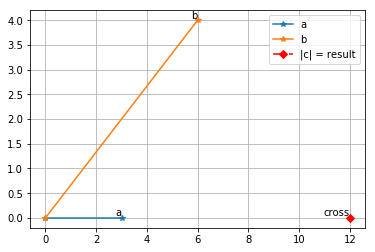

In [13]:
def dot(a, b):
    o = (0, 0)
    ma = np.linalg.norm(a)
    mb = np.linalg.norm(b)
    c = np.cross(a, b)
    
    print('car   magnitude:', ma)
    print('boost magnitude:', mb)
    print('final magnitude:', c)
    
    plot(*np.dstack([o, a])[0], marker='*', label='a')
    plot(*np.dstack([o, b])[0], marker='*', label='b')
    plot(c, 0, linestyle='-.', marker='D', color='red', label='|c| = result')
    annotate('cross', xy=(c, 0), horizontalalignment='right', verticalalignment='bottom')
    annotate('a', xy=a, horizontalalignment='right', verticalalignment='bottom')
    annotate('b', xy=b, horizontalalignment='right', verticalalignment='bottom')
    grid()
    legend()

a = np.array([3, 0])
b = np.array([6, 4])
dot(a, b)

car   magnitude: 10.0
boost magnitude: 10.0
final magnitude: 100


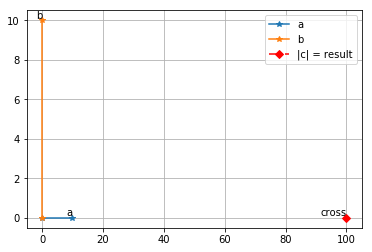

In [14]:
# 서로의 방향이 perpendicular일때는 0값이 됨
a = np.array([10, 0])
b = np.array([0, 10])
dot(a, b)

car   magnitude: 2.0
boost magnitude: 2.0
final magnitude: 0


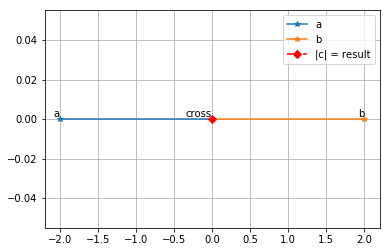

In [15]:
# 서로의 방향이 반대방향을때..
a = np.array([-2, 0])
b = np.array([2, 0])
dot(a, b)

car   magnitude: 1.41421356237
boost magnitude: 0.412310562562
final magnitude: -0.30000000000000004


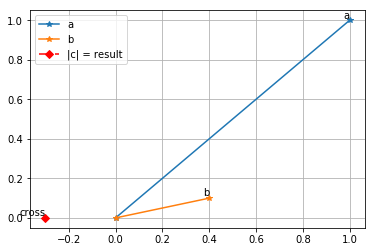

In [16]:
a = np.array([1, 1])
b = np.array([0.4, 0.1])
dot(a, b)

car   magnitude: 2.0
boost magnitude: 0.5
final magnitude: 0.0


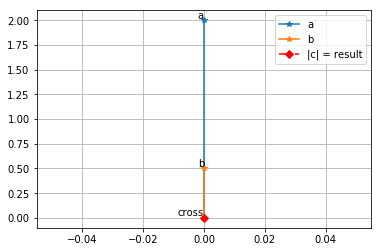

In [17]:
a = np.array([0, 2])
b = np.array([0, 0.5])
dot(a, b)

# Cross Product

Vector a와 Vector b의 cross product는 a와 b에 perpendicular인 다른 vector를 내놓습니다. 

<img src="images/cross-product-simple.gif">


### Example

The cross product of a = (2,3,4) and b = (5,6,7)

$$ cx = a_yb_z − a_zb_y = 3×7 − 4×6 = −3$$ 
$$ cy = a_zb_x − a_xb_z = 4×5 − 2×7 = 6 $$
$$ cz = a_xb_y − a_yb_x = 2×6 − 3×5 = −3$$
Answer: $ a × b = (−3,6,−3) $

[1 0 0] cross [0 1 0] = [0 0 1]


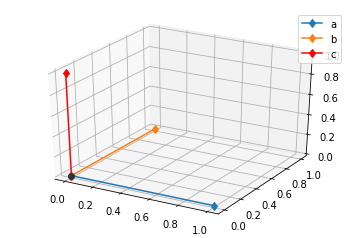

In [93]:
def cross3d(a, b):
    o = (0, 0, 0)
    c = np.cross(a, b)
    
    print(f'{a} cross {b} = {c}')
    fig = figure()
    ax = fig.gca(projection='3d')
    ax.plot(*np.dstack([o, a])[0], marker='d', label='a')
    ax.plot(*np.dstack([o, b])[0], marker='d', label='b')
    ax.plot(*np.dstack([o, c])[0], marker='d', label='c', color='red')
    ax.plot([0], [0], [0], marker='o', color='#333333')
    ax.grid()
    ax.legend()
    

a = np.array([1, 0, 0])

b = np.array([0, 1, 0])
d = cross3d(a, b)

[ 2.   0.5  0. ] cross [ 0.5  5.   0. ] = [ 0.    0.    9.75]


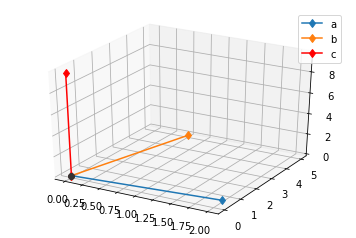

In [94]:
a = np.array([2, 0.5, 0])
b = np.array([0.5, 5, 0])
cross3d(a, b)

[0 0 1] cross [0 1 0] = [-1  0  0]


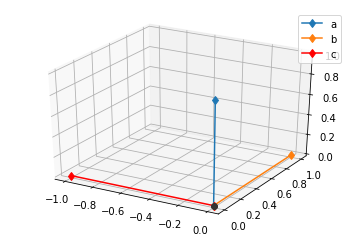

In [96]:
a = np.array([0, 0, 1])
b = np.array([0, 1, 0])
cross3d(a, b)

[2 2 2] cross [ 3  1 10] = [ 18 -14  -4]


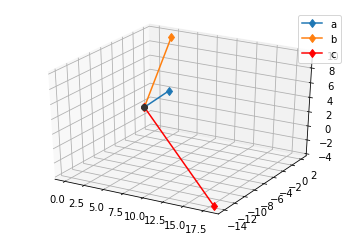

In [113]:
a = np.array([2, 2, 2])
b = np.array([3, 1, 10])
cross3d(a, b)

[ 1.   2.   0.5] cross [ 3.   1.   0.5] = [ 0.5  1.  -5. ]


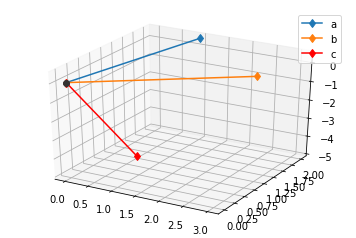

In [136]:
a = np.array([1, 2, 0.5])
b = np.array([3, 1, 0.5])
cross3d(a, b)

[ 1.   0.   0.5] cross [ 0.   1.   0.5] = [-0.5 -0.5  1. ]


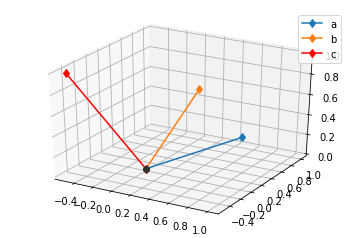

In [134]:
a = np.array([1, 0, 0.5])
b = np.array([0, 1, 0.5])
cross3d(a, b)